### We start with visualizing five of the images

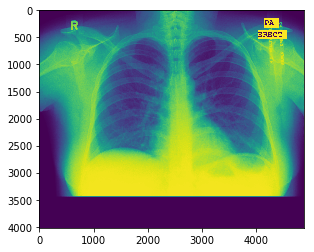

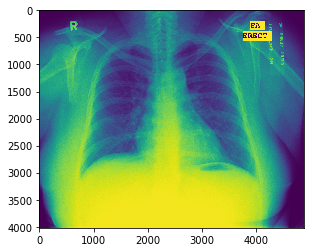

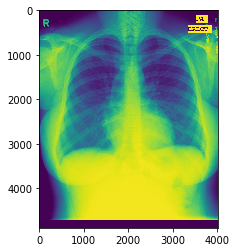

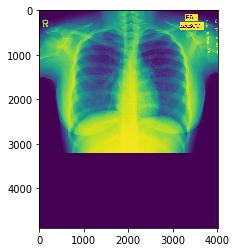

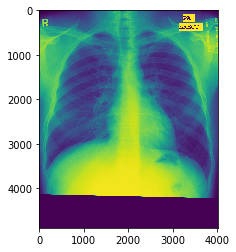

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
import numpy as np

imgList = [] # A list of five of the images (we voegen er later natuurlijk meer aan toe)

for img in range(1,6):
    imgName = 'Data\\MontgomerySet\\CXR_png\\MCUCXR_000{0}_0.png'.format(img)
    imgList += [imgName]
    img = mpimg.imread(imgName)
    plt.imshow(img)
    plt.show()

### We try preprocessing on the images
#### First, we crop because there are black boxes

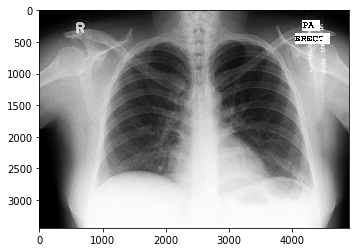

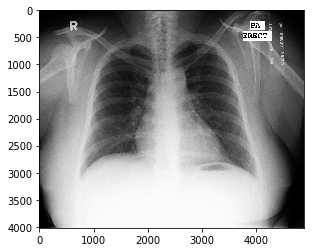

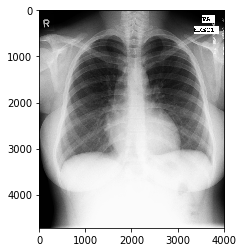

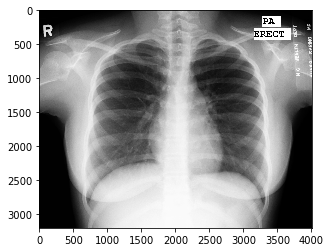

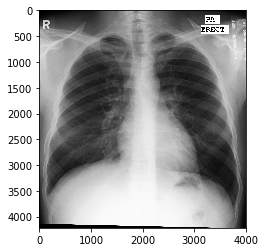

In [4]:
from PIL import Image, ImageChops
from matplotlib.pyplot import imshow, show
import numpy as np

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

for img in imgList:
    img = Image.open(img)
    imshow(trim(img))
    #plt.yticks(np.arange(0, 4001, 500))
    plt.show()

#### Then we get rid of other obstacles

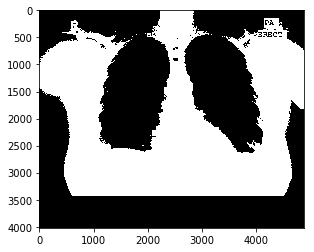

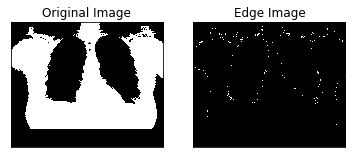

D:\Users\Emperor Justinian\Anaconda\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or
D:\Users\Emperor Justinian\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Users\Emperor Justinian\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
D:\Users\Emperor Justinian\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1334: Matplotli

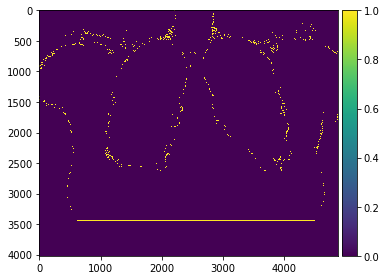

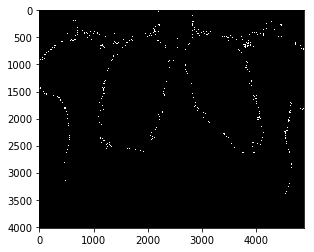

In [5]:
%matplotlib inline

from PIL import Image
import numpy as np
import cv2

img = Image.open('Data\\MontgomerySet\\CXR_png\\MCUCXR_0001_0.png')
# bw = img.point(lambda x: 0 if x<128 else 255, '1')
# imshow(bw)
# plt.show()

# Let numpy do the heavy lifting for converting pixels to pure black or white
#bw = np.asarray(img)
bw = np.array(img)

bw.setflags(write=1)

# Pixel range is 0...255, 256/2 = 128
bw[bw < 128] = 0    # Black
bw[bw >= 128] = 255 # White
imfile = Image.fromarray(bw)

#imfile.save('fil.png')

imshow(imfile)
plt.show()

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('fil.png',0)
edges = cv2.Canny(img,50,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

from skimage import feature, io
 
im = io.imread('fil.png')
edges = feature.canny(im)
io.imshow(edges)
io.show()


 
im = cv2.imread('fil.png')
edges = cv2.Canny(im,25,255,L2gradient=False)
plt.imshow(edges,cmap='gray')
plt.show()